In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
# Load the dataset
df = pd.read_csv("IPL 2022.csv")

In [117]:
# Inspect the structure of the dataset
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     obje

In [118]:
# Handling missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Impute missing numerical values with median
df.fillna("Unknown", inplace=True)  # Fill missing categorical values with 'Unknown'


In [119]:
# Removing duplicate records
df.drop_duplicates(inplace=True)

In [120]:
# Detecting and treating outliers
for col in df.select_dtypes(include=[np.number]):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [121]:
# Standardizing categorical values
df = df.map(lambda x: x.strip().title() if isinstance(x, str) else x)

In [122]:
# Univariate Analysis
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        match_id  first_ings_score  first_ings_wkts  second_ings_score  \
count  74.000000         74.000000        74.000000          74.000000   
mean   37.500000        171.506757         6.141892         158.969595   
std    21.505813         27.825593         2.204479          28.169974   
min     1.000000         96.500000         0.500000          92.875000   
25%    19.250000        154.250000         5.000000         142.750000   
50%    37.500000        169.500000         6.000000         160.000000   
75%    55.750000        192.750000         8.000000         176.000000   
max    74.000000        222.000000        10.000000         211.000000   

       second_ings_wkts     margin   highscore  
count         74.000000  74.000000   74.000000  
mean           6.175676  13.692568   71.633446  
std            2.639832  11.744227   20.438874  
min            1.000000   2.000000   28.000000  
25%            4.000000   5.250000   57.000000  
50%            6.0

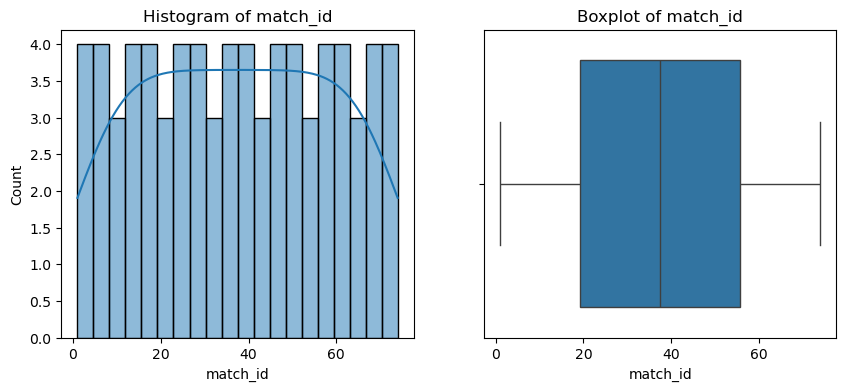

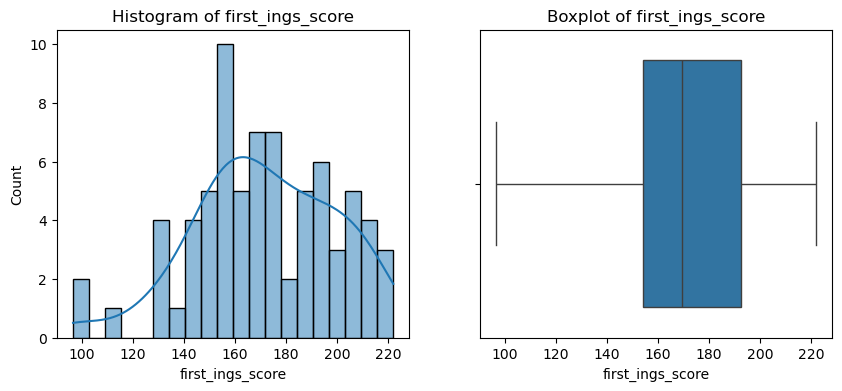

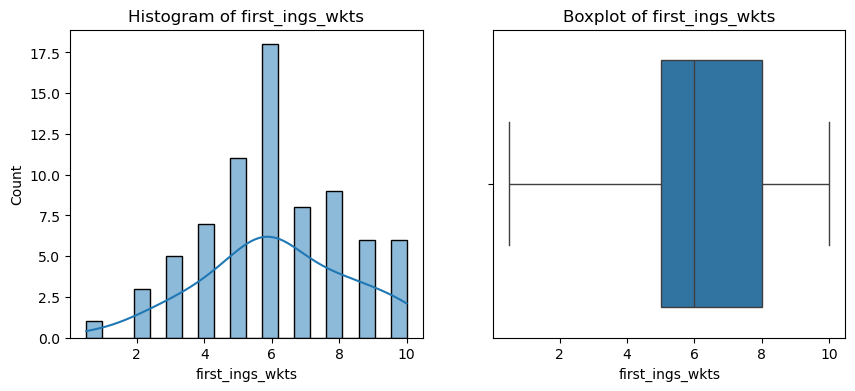

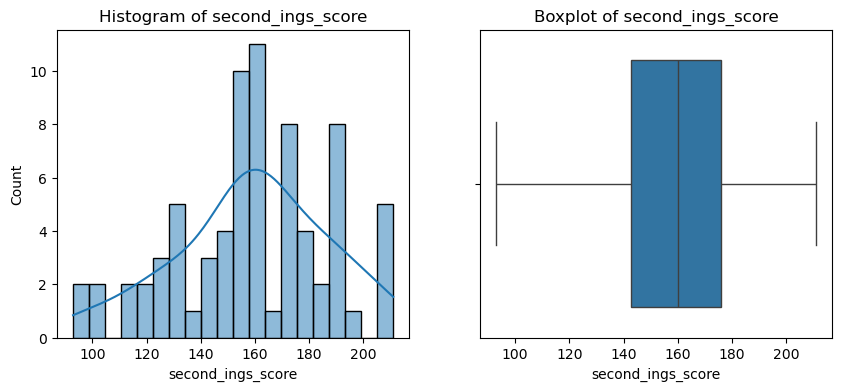

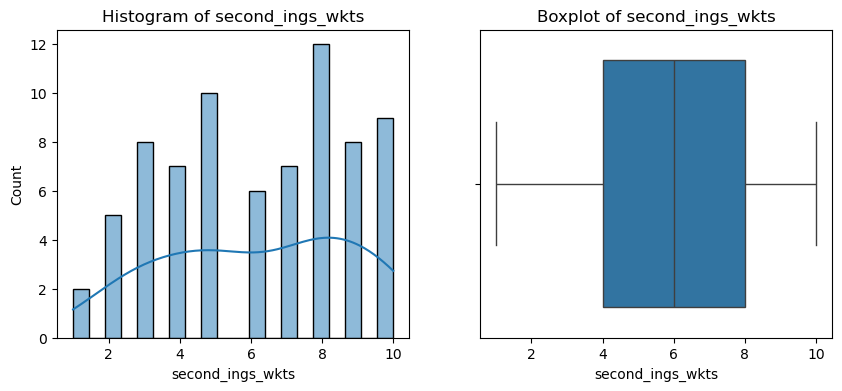

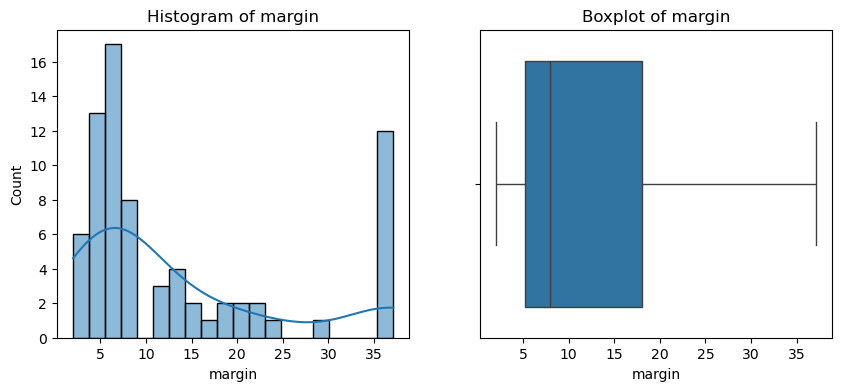

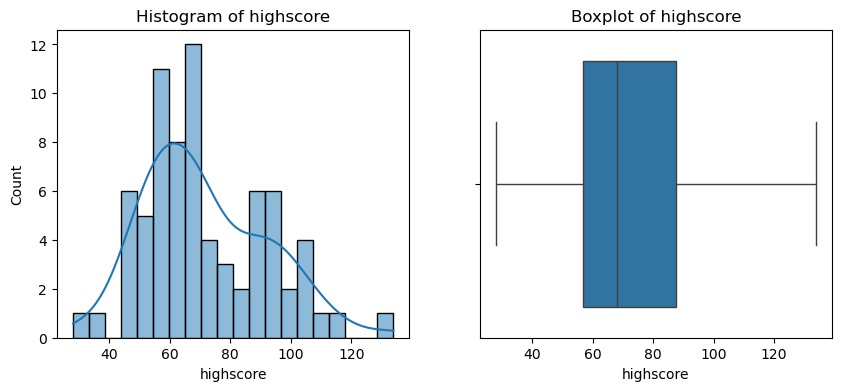

In [123]:
# Histograms and Box Plots
for col in df.select_dtypes(include=[np.number]):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Histogram of {col}")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

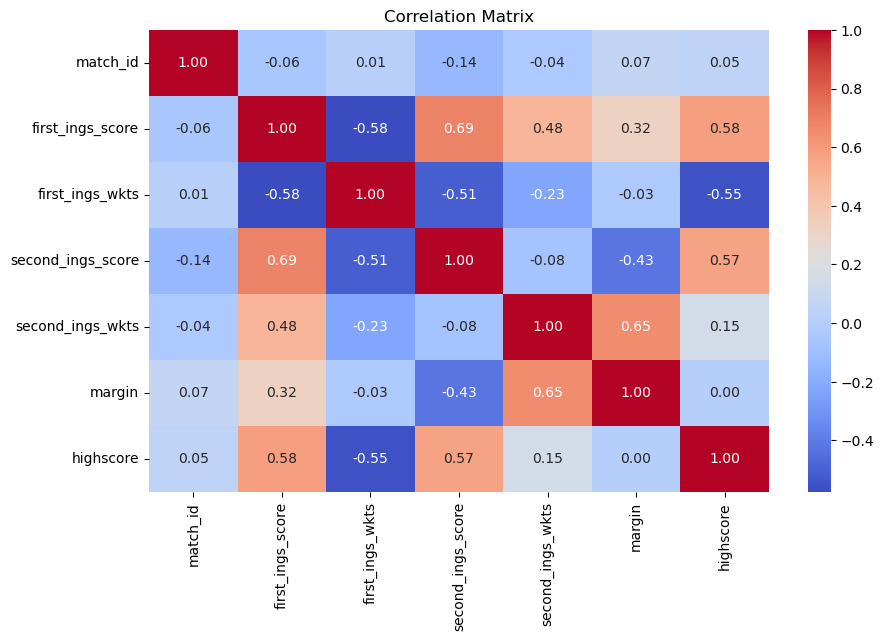

In [124]:
# Bivariate Analysis
# Correlation matrix
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

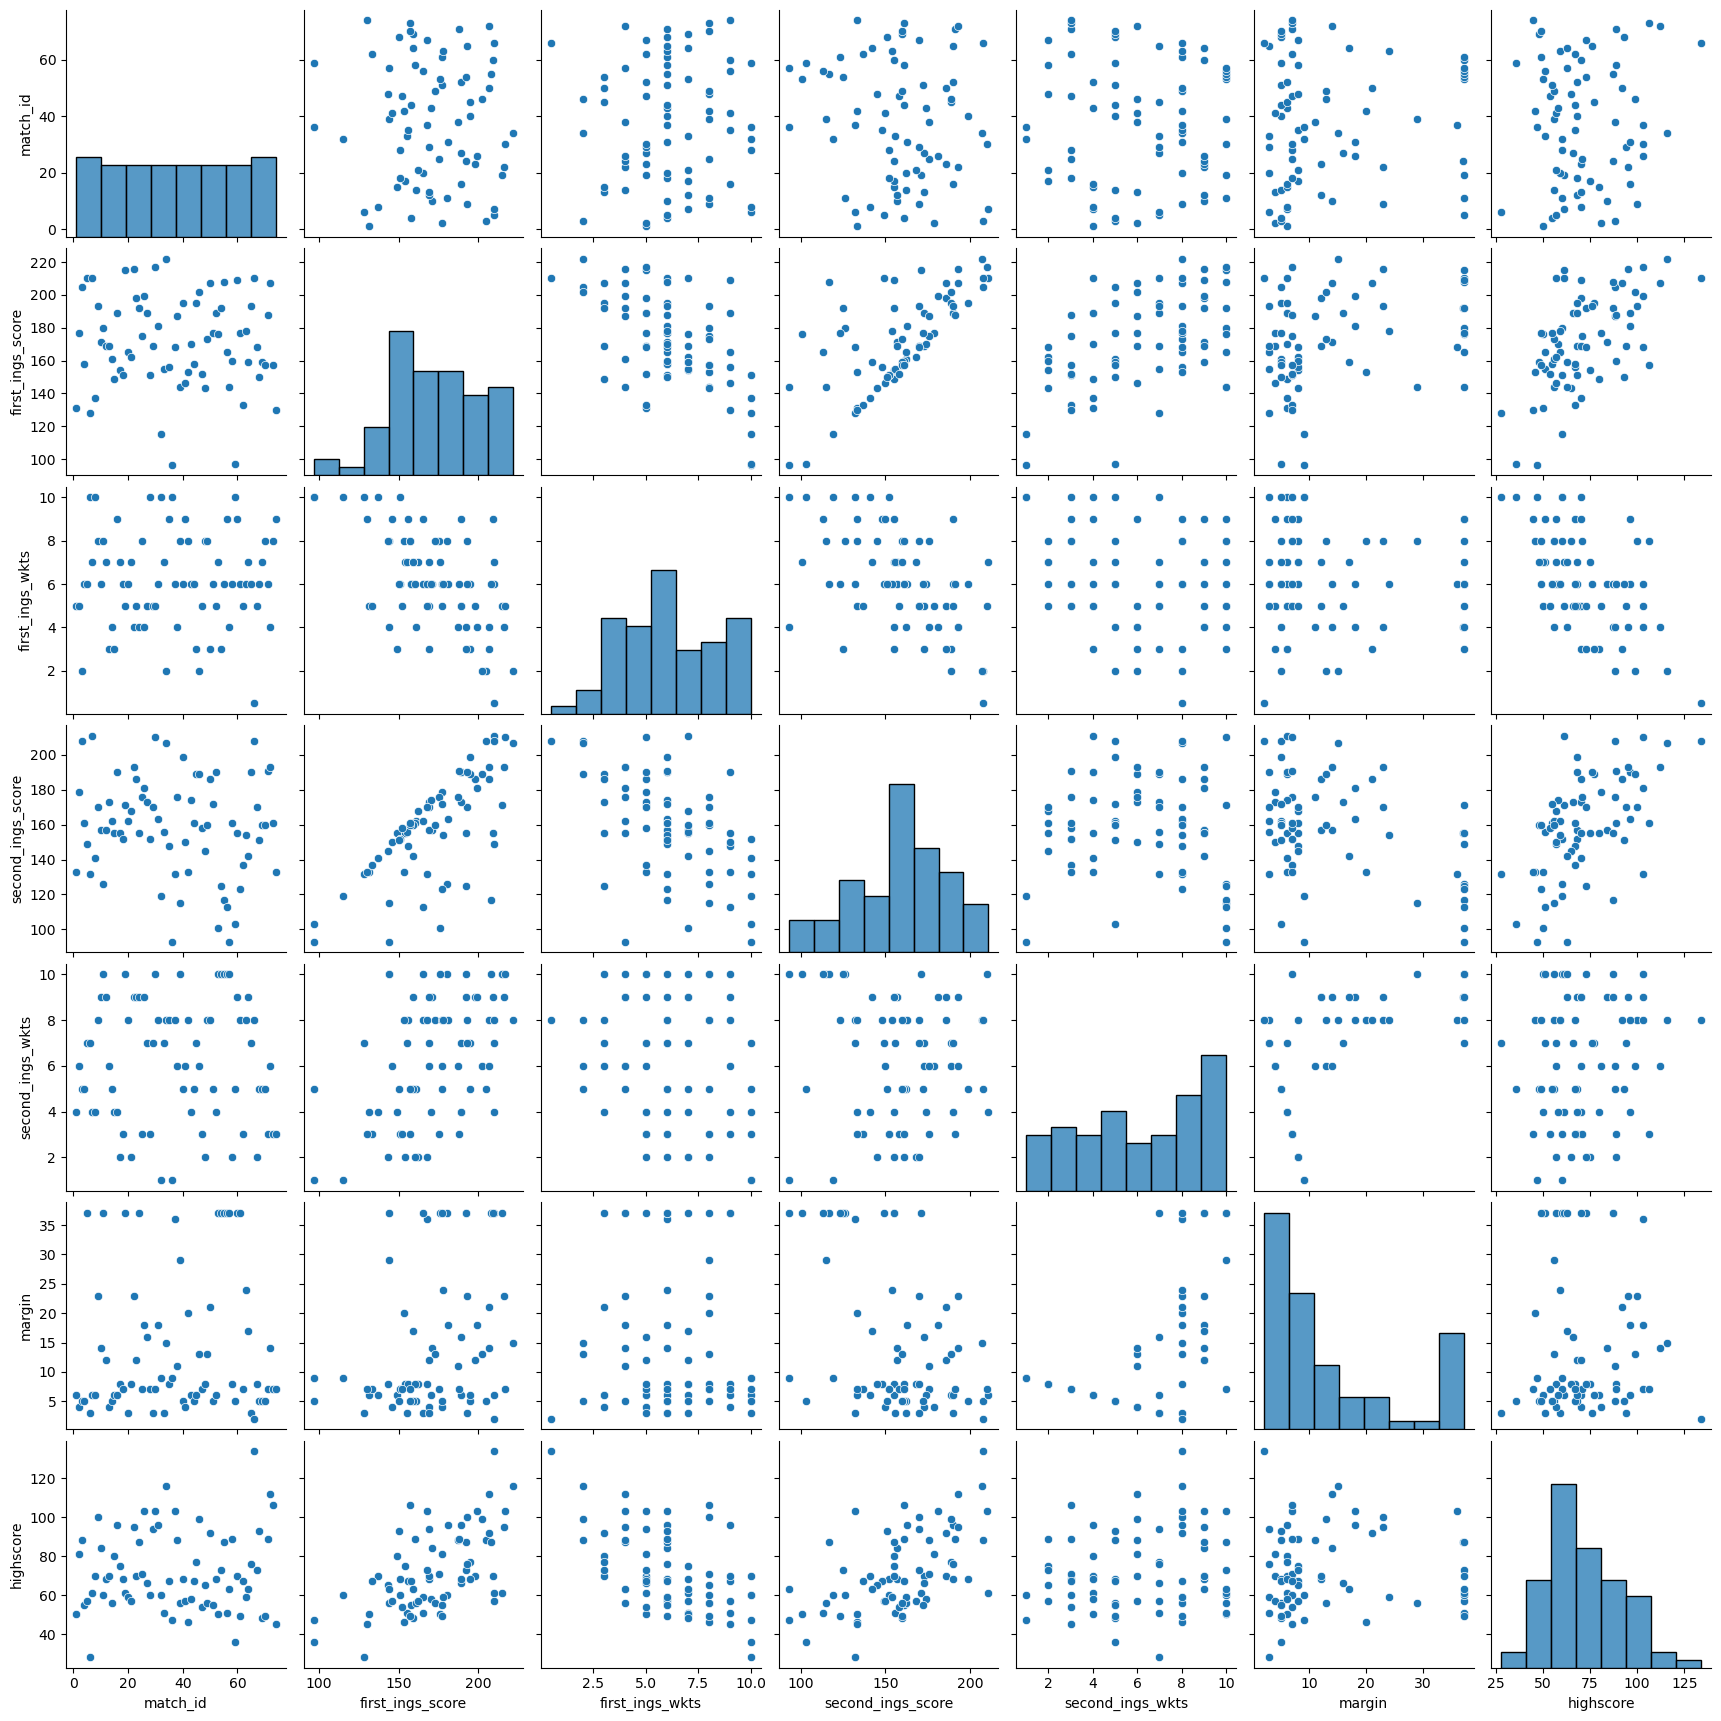

In [125]:
# Scatter plots for numerical relationships
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

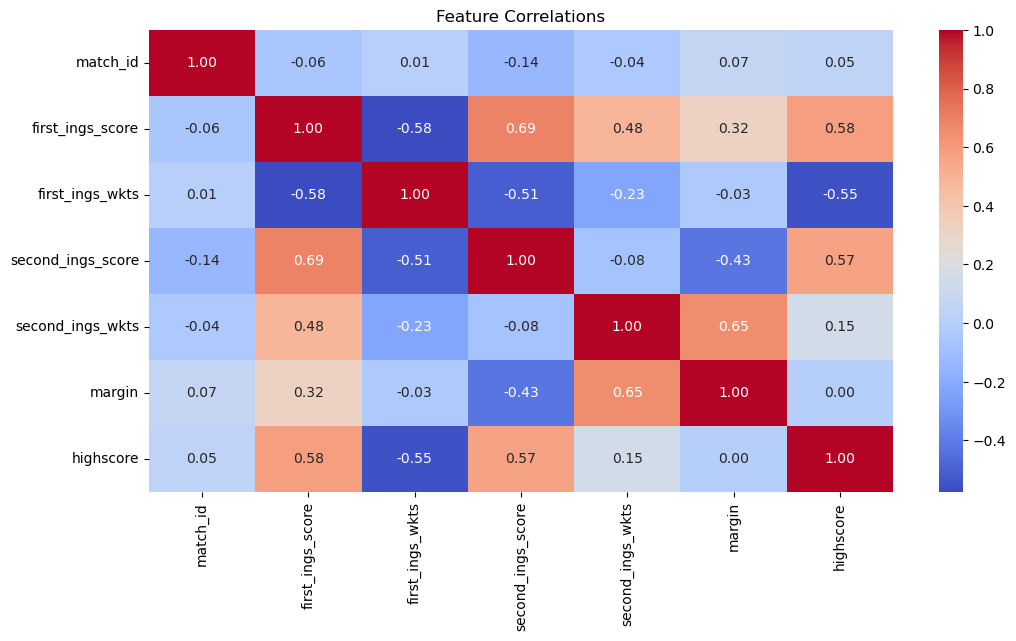

In [140]:
# Multivariate Analysis
# Heatmap
plt.figure(figsize=(12, 6))
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
# Checking if numeric columns exist
if numeric_df.shape[1] > 0:
    corr_matrix = numeric_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Feature Correlations")
    plt.show()
else:
    print("No numeric columns available for correlation heatmap.")

Here is an elaborate report of IPL 2022